# ML2. 지도학습

## 지도 학습 알고리즘
- 데이터 불러오기
- 훈련 데이터와 답안 데이터로 나누기
- 데이터 살펴보기
- 모델 생성하기
- (예측하기)
- 모델 평가하기

> 베이스라인 -> 완벽하지 않아도 좋지만 전체 과정을 실행 후 개선점을 빠르게 찾고 반영하기 위한 모델

### ML의 절차

1. 문제 정의 및 방법 결정
1. 데이터 전처리
1. 데이터 불러오기
1. 데이터 나누기
1. 데이터 살펴보기
1. 모델 생성
1. 모델 평가

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
import mglearn
from preamble import *

!pip install koreanize-matplotlib

### 데이터 확인

X.shape: (26, 2) y.shape: (26,)


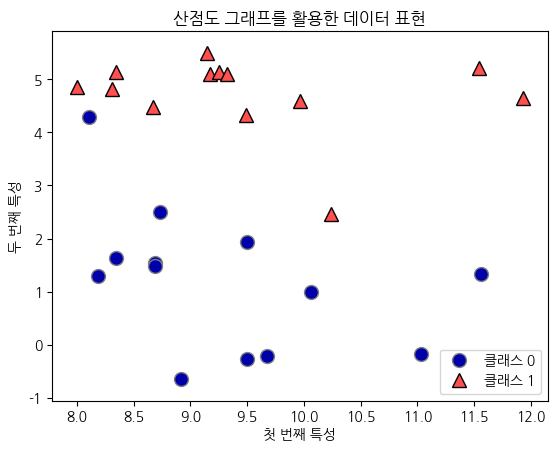

In [3]:
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스 0","클래스 1"], loc=4)
plt.title("산점도 그래프를 활용한 데이터 표현")
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:",X.shape, "y.shape:",y.shape)

0과 1은 세모 동그라미로 '산점도' 도식화  
=> 데이터의 '분포'의 경향성을 본다

그래프 표기할때 웬만하면 제목이랑 축, 범례 표기하도록 하자

In [4]:
print(X,y)

[[ 9.963  4.597]
 [11.033 -0.168]
 [11.542  5.211]
 [ 8.693  1.543]
 [ 8.106  4.287]
 [ 8.31   4.806]
 [11.93   4.649]
 [ 9.673 -0.203]
 [ 8.348  5.134]
 [ 8.675  4.476]
 [ 9.177  5.093]
 [10.24   2.455]
 [ 8.689  1.487]
 [ 8.922 -0.64 ]
 [ 9.491  4.332]
 [ 9.257  5.133]
 [ 7.998  4.853]
 [ 8.184  1.296]
 [ 8.734  2.492]
 [ 9.323  5.098]
 [10.064  0.991]
 [ 9.5   -0.264]
 [ 8.345  1.638]
 [ 9.502  1.938]
 [ 9.151  5.498]
 [11.564  1.339]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


밑으로 내려오는게 X, 옆으로 늘어진게 y

Text(0, 0.5, '타깃')

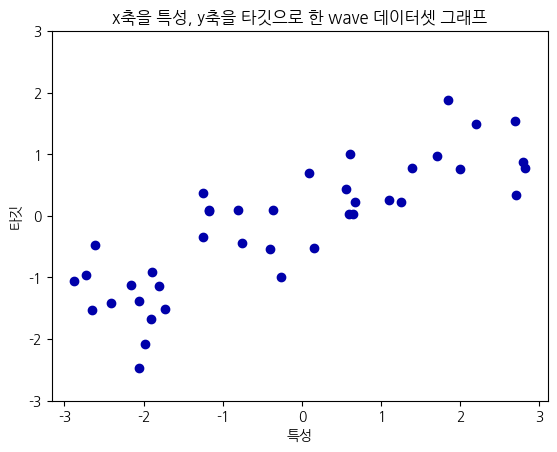

In [5]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.title("x축을 특성, y축을 타깃으로 한 wave 데이터셋 그래프")
plt.xlabel("특성")
plt.ylabel("타깃")

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
X,y = mglearn.datasets.load_extended_boston()
print(X.shape, y.shape)

(506, 104) (506,)


## K-NN

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

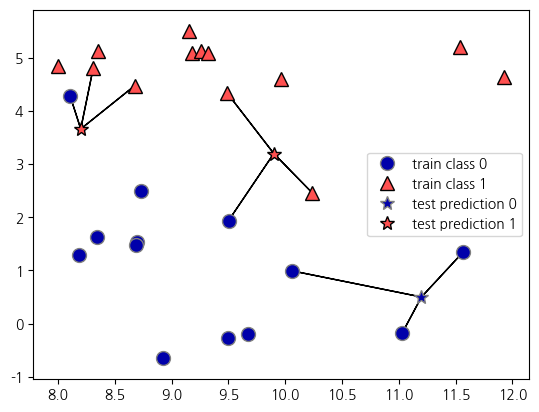

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

※짝수개로는 하지 말자

### K-NN 모델 평가

In [11]:
clf.score(X_test, y_test)

0.8571428571428571

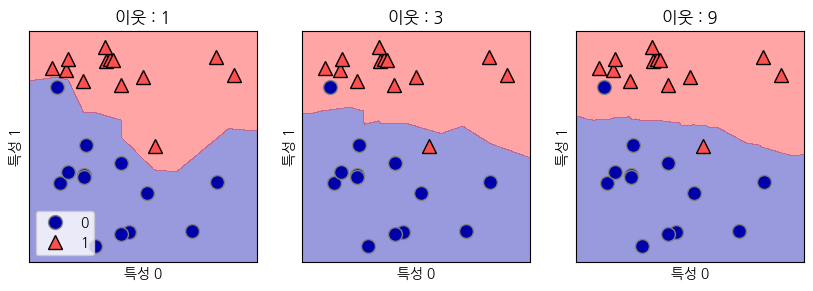

In [12]:
fig, axes = plt.subplots(1,3,figsize=(10,3))
# fig = 도화지
# plt에게 subplots(하위 도화지) 1행 3열짜리 그리게 함 도화지 사이즈 (10 by 3)

for n_neighbors, ax in zip([1,3,9],axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) # 모델과 X가 주어짐 => y 구한다
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax) # 점 찍기
    ax.set_title(f"이웃 : {n_neighbors}")
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

옆으로 그린다
3장 한번에 못그리니 하나씩 그려야된다 (for 루프)
밑그림 다 그리고 색칠 하나씩 하거나, 한장 그리고 붙이고 해야한다 

k-NN의 역설 

### 복잡한 데이터를 활용한 K-NN

In [39]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train , y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)
training_accuracy=[]
test_accuracy=[]
neighbors_settings = range(1,11)

In [40]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test,y_test))

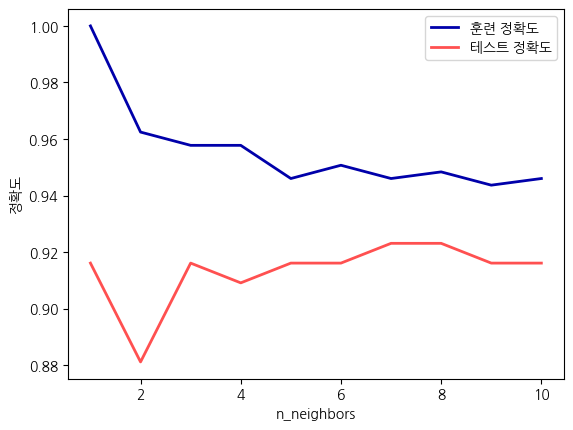

In [41]:
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

k-NN => 일반화 시킬 수 있는가? X  => 전처리 영향을 많이 받음

선형모델 => 회귀

## 선형 모델

w[0]: 0.393906  b: -0.031804


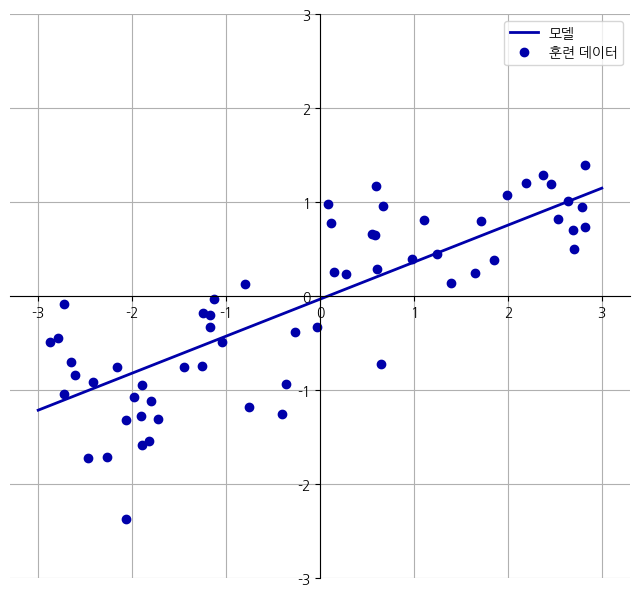

In [45]:
mglearn.plots.plot_linear_regression_wave()

In [48]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [49]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:",lr.intercept_) 

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [50]:
print(lr.score(X_train,y_train), lr.score(X_test, y_test))

0.6700890315075756 0.65933685968637
